# Recipe 4: PCA on Financial Data

This recipe lays out a very general process for how to conduct a principal component analysis. The dataset I'm using includes different financial metrics for individuals. I obtained the data from Kaggle:

https://www.kaggle.com/datasets/nitindatta/finance-data?resource=download


Step 1: Importing necessary packages

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Step 2: Read in the data, select only numeric variables, and drop missing values

In [48]:
df = pd.read_csv('Finance_data.csv')
df_num = df.select_dtypes(include='number').dropna()
df_num.head()

,age,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold
0,34,1,2,5,3,7,6,4
1,23,4,3,2,1,5,6,7
2,30,3,6,4,2,5,1,7
3,22,2,1,3,7,6,4,5
4,24,2,1,3,6,4,5,7


Step 3: Scale the data and perform SVD to calculate principal components

In [44]:
scaler = StandardScaler()
X = scaler.fit_transform(df_num)
U, S, VT = np.linalg.svd(X, full_matrices = False)
PCs = U @ np.diag(S)

Step 4: Calculate explained variance and plot the total variance explained by the principal components

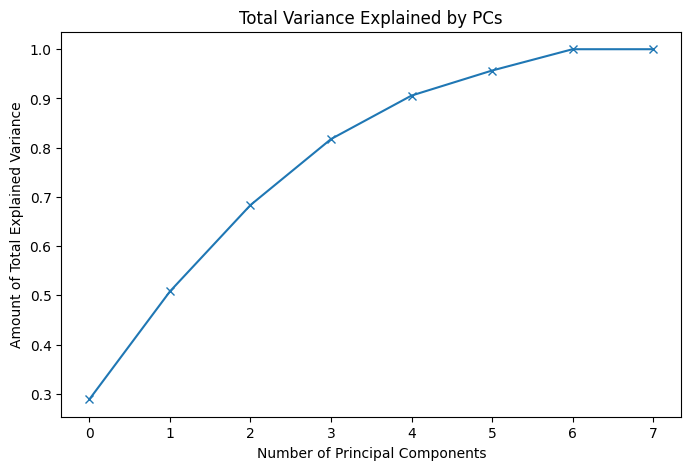

In [45]:
# Calculate explained variance for each component
explained_variance = (S ** 2) / (len(X) - 1)
explained_variance_ratio = explained_variance / explained_variance.sum()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratio),marker='x')
plt.xlabel('Number of Principal Components')
plt.ylabel('Amount of Total Explained Variance')
plt.title('Total Variance Explained by PCs')
plt.show()

Step 5: Select the number of PCs that explain 95% variance and project the data onto these components. Then we will plot the data in 2D using just the first two PCs.

Number of components explaining 95% variance: 6


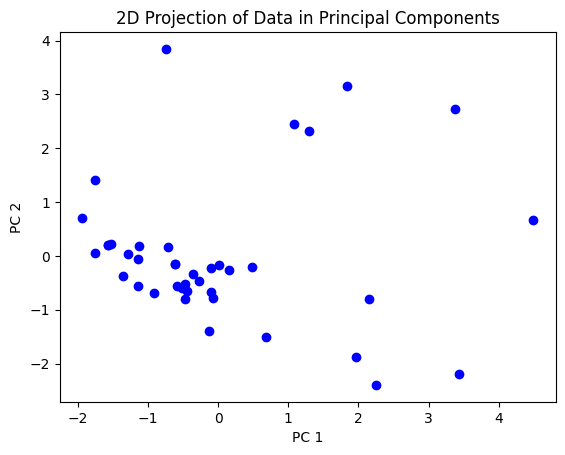

In [47]:
# Select the number of components explaining 95% variance
num_components = np.argmax(np.cumsum(explained_variance_ratio) >= 0.95) + 1
print("Number of components explaining 95% variance:", num_components)

# Project the data onto the selected components
X_centered = X - np.mean(X, axis=0)  # Mean center the data
X_pca = np.dot(X_centered, VT.T[:, :num_components])

# Visualize the transformed data using the first two PCs
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('2D Projection of Data in Principal Components')
plt.show()